# **Telecom Churn Data | Model**

*Authors:*
- *Myroslava Sánchez Andrade A01730712*
- *Karen Rugerio Armenta A01733228*
- *José Antonio Bobadilla García A01734433*
- *Alejandro Castro Reus A01731065*

*Creation date: 15/10/2022*

*Last updated: 04/11/2022*

---

## **Importing data**

In Artificial Intelligence the modeling is the **creation, training, and deployment** of Machine Learning algorithms. The goal is to emulate logical decision-making based on the available data. 

In [505]:
# REQUIRED LIBRARIES
# !pip install pandas numpy matplotlib sklearn joblib

In [506]:
# RUN ONLY FOR GOOGLE COLAB

# from google.colab import drive

# drive.mount("path")  

# %cd "path"

In [507]:
# Importing the necessary libraries for the data analysis and transformations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from joblib import dump
import py7zr

In [508]:
target = 'Churn'
smote = 0

In [509]:
with py7zr.SevenZipFile('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/original_train.7z', mode='r') as z:
    z.extractall(path='original_train/')
with py7zr.SevenZipFile('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/x_test.7z', mode='r') as z:
    z.extractall(path='x_test/')
with py7zr.SevenZipFile('../../../../data/WA_Fn-UseC_-Telco-Customer-Churn/test/y_test.7z', mode='r') as z:
    z.extractall(path='y_test/')

In [510]:
# Obtaining the train and test dataset
train = pd.read_csv('./original_train/original_train.csv')

x_test = pd.read_csv('./x_test/x_test.csv')
y_test = pd.read_csv('./y_test/y_test.csv')

In [511]:
x_train = train.drop([target], axis=1)
y_train = pd.DataFrame(train[target])

### **Implementing the algorithm**
****

Multi layer perceptron (MLP) is a supplement of feed forward neural network. It consists of three types of layers:
- The **input** layer: In this case are the clients with the filtered information.
- The **output** layer: Target predicted for each client. (0/1)
- The **hidden** layer: Layers placed in between the input and output fully in charge of the learning. They need a number of epochs, size of the hidden layers, an activaction function and a solver type. In a MLP model, the data flows in the forward direction from input to output layer. 

We decided to use this model due to its high efficiency working with classification problems and its easy implementation.

In [512]:
#Initializing the MLPClassifier hyperparameters
classifier = MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [513]:
#Fitting the training data to the network
classifier.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [514]:
#Predicting y for X_val
y_pred_prob = classifier.predict_proba(x_test)
y_pred = classifier.predict(x_test)
y_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [515]:
y_pred_prob

array([[0.9943895 , 0.0056105 ],
       [0.95088843, 0.04911157],
       [0.98388837, 0.01611163],
       ...,
       [0.74343454, 0.25656546],
       [0.90239867, 0.09760133],
       [0.96074761, 0.03925239]])

### **Model Evaluation**
****

In [516]:
#Getting the accuracy of the model
classifier.score(x_test, y_test)

0.8039772727272727

In [517]:
#Creating a confusion matrix to help determinate accuracy wtih classification model
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [518]:
#Evaluataion of the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)

#Printing the accuracy
acc = round(accuracy(cm),2)
percentage = "{:.0%}".format(acc)
print(f"Accuracy of Model: {percentage}")
#cm

# sumas todo

Accuracy of Model: 80%


In [519]:
# Confussion Matrix
pd.DataFrame(cm)

,0,1
0,1433,293
1,121,265


### **Validation with K-fold Cross validation**
****

In [520]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate
kf = KFold(n_splits=3)
def cross_validation(model, _X, _y, _cv=3):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }


In [521]:
# Grouped Bar Chart for both training and validation data
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(4,3))
        labels = ["1st Fold", "2nd Fold", "3rd Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [522]:
mlp_results = cross_validation(classifier, x_train, y_train)
mlp_results

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.p

{'Training Accuracy scores': array([nan, nan, nan]),
 'Mean Training Accuracy': nan,
 'Training Precision scores': array([nan, nan, nan]),
 'Mean Training Precision': nan,
 'Training Recall scores': array([nan, nan, nan]),
 'Mean Training Recall': nan,
 'Training F1 scores': array([nan, nan, nan]),
 'Mean Training F1 Score': nan,
 'Validation Accuracy scores': array([nan, nan, nan]),
 'Mean Validation Accuracy': nan,
 'Validation Precision scores': array([nan, nan, nan]),
 'Mean Validation Precision': nan,
 'Validation Recall scores': array([nan, nan, nan]),
 'Mean Validation Recall': nan,
 'Validation F1 scores': array([nan, nan, nan]),
 'Mean Validation F1 Score': nan}

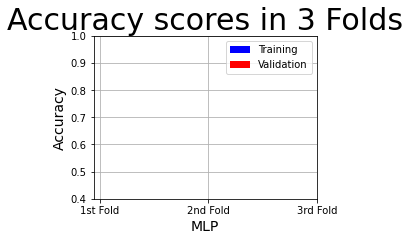

In [523]:
# Plot Accuracy Result
model_name = "MLP"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 3 Folds",
            mlp_results["Training Accuracy scores"],
            mlp_results["Validation Accuracy scores"])

### **Exporting the model**
****

In [527]:
dump(classifier, "../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/classification-model.joblib")

['../../joblibs/WA_Fn-UseC_-Telco-Customer-Churn/model/classification-model.joblib']